In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer


In [3]:
! pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=aaa33bfc8883d59ab60ced960dbe4aa1297c0e746f886c930d370683748c3661
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [88]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 91kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678217 sha256=2158fad852dbeb0341cc5b05ee3613837094721ee55128d642cb0fe94eead533
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/Great Learning/ratings_Electronics.csv", delimiter=",")

In [40]:
df.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [0]:
df.columns=['userid','productid','rating','timestamp'];

In [42]:
df.head(2)

,userid,productid,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600


In [43]:
for col in df.columns: 
    print(col) 

userid
productid
rating
timestamp


In [0]:
df=df.drop('timestamp',axis=1)

In [45]:
df.shape

(7824481, 3)

there are 7824481 inputs provided

In [0]:
import matplotlib.pyplot as plt

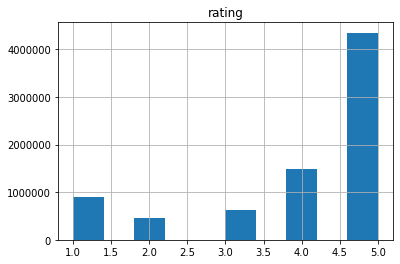

In [47]:
hist = df.hist(bins=10)

Inference from histogram: most ratings are high

In [48]:
df.dtypes

userid        object
productid     object
rating       float64
dtype: object

In [49]:
df.describe()

,rating
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [65]:
df.groupby('rating').count()

,userid,productid
rating,,
1.0,901765,901765
2.0,456322,456322
3.0,633073,633073
4.0,1485781,1485781
5.0,4347540,4347540


In [50]:
df.groupby('productid')['rating'].mean().sort_values(ascending=False).head(10)

productid
BT008V9J9U    5.0
B0058PRC0S    5.0
B0058ORBFU    5.0
B0058OQ9Q2    5.0
B0058OKSMS    5.0
B0058OHGX2    5.0
B0058O9OR8    5.0
B0058O6O8K    5.0
B0058O6J3A    5.0
B0058O6EXA    5.0
Name: rating, dtype: float64

In [0]:
count=df.groupby('userid')['rating'].count()

In [0]:
df2=df[df['userid'].isin(count[count >= 50].index)]

In [73]:
df2.head()

,userid,productid,rating
93,A3BY5KCNQZXV5U,0594451647,5.0
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0


In [75]:
df2.shape

(125871, 3)

In [0]:
ratings_mean_count = pd.DataFrame(df2.groupby('productid')['rating'].mean()) 

In [0]:
ratings_mean_count['rating_counts'] =pd.DataFrame(df2.groupby('productid')['rating'].count())

In [80]:
ratings_mean_count= ratings_mean_count.reset_index(drop = False)
df_100_product= ratings_mean_count[ratings_mean_count['rating_counts'] >100]
df_100_product

,productid,rating,rating_counts
11078,B000N99BBC,4.772455,167
21982,B002R5AM7C,4.125000,128
22210,B002SZEOLG,4.247788,113
22460,B002V88HFE,4.698113,106
23378,B0034CL2ZI,4.632075,106
24827,B003ES5ZUU,4.864130,184
28761,B004CLYEDC,4.669492,118
31001,B004T9RR6I,3.871560,109
38250,B007WTAJTO,4.701220,164
38611,B00829THK0,4.416058,137


In [82]:
df_100_product.shape

(15, 3)

In [0]:
df_100_product_sorted = df_100_product.sort_values('rating',ascending=False)



In [85]:
rec_count = df_100_product_sorted.head(10)
rec_count 

,productid,rating,rating_counts
24827,B003ES5ZUU,4.864130,184
11078,B000N99BBC,4.772455,167
38250,B007WTAJTO,4.701220,164
22460,B002V88HFE,4.698113,106
28761,B004CLYEDC,4.669492,118
38656,B00834SJSK,4.643564,101
23378,B0034CL2ZI,4.632075,106
38655,B00834SJNA,4.490909,110
38615,B00829TIEK,4.436242,149
38611,B00829THK0,4.416058,137


In [86]:
ratings_mean_count.groupby('productid')['rating'].mean().sort_values(ascending=False).head()  

productid
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [0]:
reader = Reader(line_format='user item rating ', sep=',',rating_scale=(1, 5))

In [0]:
data = Dataset.load_from_df(df2[['userid', 'productid', 'rating']], reader)

In [92]:
data

In [0]:
trainset, testset = train_test_split(data, test_size=.3)

In [0]:
#Importing SVD from Surprise
from surprise import SVD
#importing gridsearchcv fro parameter tunning 
from surprise.model_selection import GridSearchCV

In [0]:
# defining Parameter Grid 
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

#Instantiating gridsearchcv object
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# fitting data into the object  
gs.fit(data)

In [96]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9891750214241318
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [0]:
algo = gs.best_estimator['rmse']
trainingSet = data.build_full_trainset()
trainingSet = algo.fit(trainingSet)

In [0]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [99]:
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,1.015239,1.019292,1.017668,1.017400,0.001666,7,0.780957,0.781483,0.782686,0.781709,0.000724,7,1.713564,0.017191,0.381707,0.085026,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}",5,0.002,0.4
1,1.016642,1.021038,1.018607,1.018762,0.001798,8,0.783242,0.783854,0.784197,0.783764,0.000395,8,1.679082,0.002806,0.450767,0.089332,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}",5,0.002,0.6
2,0.995712,1.000570,0.998830,0.998371,0.002010,3,0.757703,0.758314,0.760416,0.758811,0.001162,3,1.682524,0.012684,0.384754,0.078266,"{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}",5,0.005,0.4
3,0.998490,1.002727,1.000965,1.000727,0.001738,4,0.761855,0.762149,0.763895,0.762633,0.000900,4,2.034187,0.495686,0.448509,0.080923,"{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6}",5,0.005,0.6
4,0.999500,1.004402,1.002808,1.002237,0.002042,5,0.762315,0.763476,0.764691,0.763494,0.000970,5,3.179555,0.008075,0.381362,0.077787,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}",10,0.002,0.4


In [0]:
predictions = algo.test(testset)

In [101]:
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9151


0.9150590911017312

In [102]:
predictions

[Prediction(uid='A2L0F2T1DLTNT8', iid='B002TLTE6O', r_ui=5.0, est=4.6829942754728835, details={'was_impossible': False}),
 Prediction(uid='A6FIAB28IS79', iid='B000NDO744', r_ui=3.0, est=4.177295357436568, details={'was_impossible': False}),
 Prediction(uid='A1F1A0QQP2XVH5', iid='B006TF37H8', r_ui=5.0, est=4.291794380736576, details={'was_impossible': False}),
 Prediction(uid='A20OBCQWBKCGZT', iid='B00ATZ9I9U', r_ui=4.0, est=4.279019577236032, details={'was_impossible': False}),
 Prediction(uid='A3HSDV9Y0TV5Z2', iid='B0011U65F2', r_ui=5.0, est=4.67728971751435, details={'was_impossible': False}),
 Prediction(uid='A38RMU1Y5TDP9', iid='B0031W091E', r_ui=1.0, est=4.206533764092824, details={'was_impossible': False}),
 Prediction(uid='AGHZXQL9F94T9', iid='B0002ZAIMI', r_ui=5.0, est=3.8448156451433664, details={'was_impossible': False}),
 Prediction(uid='AYB4ELCS5AM8P', iid='B00FDK99QS', r_ui=5.0, est=4.742580998814836, details={'was_impossible': False}),
 Prediction(uid='A15CL28ALB7MTZ', ii

In [0]:
from collections import defaultdict
def get_top_n(predictions,n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [0]:
top_n = get_top_n(predictions, n= 5) 

In [0]:
user_list= []
for uid, user_ratings in top_n.items():
    single_user= (uid, [iid for (iid, _) in user_ratings])
    user_list.append(single_user)

In [0]:
recommendation_for_user = pd.DataFrame(user_list,columns=['userid','recommended electronics_id'])

In [107]:
recommendation_for_user

,userid,recommended electronics_id
0,A2L0F2T1DLTNT8,"[B002TLTE6O, B00HFRWWAM, B000144I2Q, B00DOWCQB..."
1,A6FIAB28IS79,"[B000FQ2JLW, B002TMRZOQ, B001F7AHOG, B000089GN..."
2,A1F1A0QQP2XVH5,"[B00017LSPI, B007R5YDYA, B001M4HXB2, B00AJHDZS..."
3,A20OBCQWBKCGZT,"[B00CGYCOR0, B000TS7I6C, B002MCZJ78, B000U5TUW..."
4,A3HSDV9Y0TV5Z2,"[B002V88HFE, B0011U65F2, B008RM235I, B0018BQR8..."
...,...,...
1535,A13WOT3RSXKRD5,"[B00029U1DK, B008EQYRRY, B00AR95EVE, B00829TIE..."
1536,APG2BHOAXPNEQ,"[B001NS828K, B00081NX5U, B000FBT47E, B00BN1Q5J..."
1537,A1R3GN9MEJFXM3,"[B001QUA6RA, B001E1Y5O6, B00007M1TZ, B00119T6N..."
1538,A9ELHLPXF7JKD,"[B00BWHILCY, B0064X5Q5Q, B000MEDI3K, B000BN94F..."


In [0]:
user_id = 'A1NMM0RDRF6R84'
def rec_5 (user_id):
    return recommendation_for_user[recommendation_for_user['userid']== user_id]['recommended electronics_id'].tolist()

In [109]:
top_5_recommendation= pd.DataFrame(rec_5(user_id))
top_5_recommendation.iloc[0,0]

'B000GISUAS'

In [0]:
product_id_check = df2[df2['userid']== 'A1NMM0RDRF6R84']

In [112]:
product_id_check[product_id_check['productid']== top_5_recommendation.iloc[0,0] ]

,userid,productid,rating
972500,A1NMM0RDRF6R84,B000GISUAS,5.0


In [113]:
product_id_check[product_id_check['productid'] =='B000QUUFRW']

,userid,productid,rating
1312777,A1NMM0RDRF6R84,B000QUUFRW,5.0


In [0]:
reco_list= ['B000QUUFRW', 'B0040JHVC2', 'B00007IFED', 'B004WB8EYM', 'B002J9HBIO']

In [115]:
set(reco_list) - set(product_id_check['productid']) 

set()

In [0]:
## Creating Dataframe from predictions to fetch new products
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred['Iu'] = df_pred.uid.apply(get_Iu)
df_pred['Ui'] = df_pred.iid.apply(get_Ui)
df_pred['err'] = abs(df_pred.est - df_pred.rui)
best_predictions = df_pred.sort_values(by='err')[:]
#worst_predictions = df_pred.sort_values(by='err')[-10:]

In [117]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
28736,A2DKQQIZ793AV5,B00CSDMWGW,5.0,5.000000,{'was_impossible': False},54,4,0.000000
19786,A2DKQQIZ793AV5,B007WTAJTO,5.0,5.000000,{'was_impossible': False},54,106,0.000000
19608,A1XXMNLOLKNO0I,B001TH7T2U,5.0,5.000000,{'was_impossible': False},72,30,0.000000
22408,A3D0UM4ZD2CMAW,B004FA8NOQ,5.0,5.000000,{'was_impossible': False},76,7,0.000000
35097,AGLT3L7ALL4O4,B00316263Y,5.0,5.000000,{'was_impossible': False},42,31,0.000000
...,...,...,...,...,...,...,...,...
13285,A1KY5G5FP31F2F,B000LRMS66,1.0,4.635825,{'was_impossible': False},59,53,3.635825
8282,A1BZIM4WGZ6DZP,B0035ERKYW,1.0,4.685026,{'was_impossible': False},36,9,3.685026
21430,A6KL17KKN0A5L,B000JE7GPY,1.0,4.692561,{'was_impossible': False},37,39,3.692561
264,A17W0GMB0YY83M,B00834SJSK,1.0,4.800504,{'was_impossible': False},53,72,3.800504


In [0]:
rated_iid = best_predictions[best_predictions['uid'] == 'AVPNQUVZWMDSX']['iid'] 



In [0]:
all_iid = best_predictions['iid']

In [120]:
not_rated_uid =pd.DataFrame(list(set(all_iid) - set(rated_iid)),columns= ['prod_id'])
not_rated_uid

,prod_id
0,B00006JPEA
1,B0053PYDQO
2,B00CHHTOLK
3,B000EPLPPU
4,B003VAHYNC
...,...
21253,B004I2EDA4
21254,B00DJ69GSO
21255,B0042FZ92S
21256,B002D0DK8E


In [0]:
corpus_for_recomendation = best_predictions[best_predictions['iid'].isin(not_rated_uid['prod_id'])]

In [122]:
corpus_for_recomendation['est'].sort_values(ascending = False)

28736    5.000000
8929     5.000000
7787     5.000000
17434    5.000000
13756    5.000000
           ...   
14456    2.610014
22094    2.598878
12746    2.594228
33505    2.589462
4085     2.538325
Name: est, Length: 37368, dtype: float64

In [0]:
# Recommendations to be done
reco =(( corpus_for_recomendation.sort_values('est',na_position='first',ascending=False))[['iid','est']]).iloc[:5]

In [124]:
# Printing top 5 recommendation
reco = corpus_for_recomendation[['iid','est']]
reco.iloc[:5]

,iid,est
28736,B00CSDMWGW,5.0
19608,B001TH7T2U,5.0
22408,B004FA8NOQ,5.0
35097,B00316263Y,5.0
10926,B00316263Y,5.0


In [0]:
# Writing Defination for genralizing the above steps 
def  recomendation (uid):
    # Finding those product which are not rated by user
    not_rated_items_byUser =pd.DataFrame(list(set(best_predictions['iid']) - 
                                              set(best_predictions[best_predictions['uid'] == uid]['iid']))
                                              ,columns= ['prod_id'])
    # creating New dataframe which consist of only those electronic item which are not rated by user
    Items_to_be_recommended_from = best_predictions[best_predictions['iid'].isin(not_rated_items_byUser['prod_id'])]
    # sorting electronic product in ascending order and slecting top 5 products as a recomendation to a perticular user
    top_5_recommendation = ((Items_to_be_recommended_from.sort_values('est',na_position='first'
                                                                      ,ascending=False))[['iid','est']]).iloc[:5]
    return top_5_recommendation
    

In [126]:
# Recommendation for a given user 
recomendation('A1NMM0RDRF6R84')

,iid,est
28736,B00CSDMWGW,5.0
11606,B00G4UQ6U8,5.0
7787,B003ES5ZR8,5.0
17434,B0000BZL1P,5.0
13756,B0052SCU8U,5.0


In [0]:
# Getting all the products rated by given user 
product_id_check = df2[df2['userid']== 'A1NMM0RDRF6R84']
# product_id_check contains all the product rated by user an

In [129]:
product_id_check[product_id_check['productid']== 'B006W8U2MU' ]

,userid,productid,rating
